In [75]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/summer-olympics-medals/Summer-Olympic-medals-1976-to-2008.csv


The purpose of this notebook is to practice exploratory data analysis. As a sports fan, I thought this might be a good place to start learning data analysis with Python.

In [76]:
import matplotlib, matplotlib.pyplot as plt
matplotlib.style.use('default')
import pickle, pandas as pd
import seaborn as sns

In [77]:
path = "../input/summer-olympics-medals/Summer-Olympic-medals-1976-to-2008.csv"
data = pd.read_csv(path,encoding='latin-1')
data.head()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze


Here is what our data looks like: first we have the city and year the Olympic Games took place in. The other columns tell us who won Gold, Silver and Bronze in a certain competition that year.

Let's check if there are any missing values.

In [78]:
#checking for missing values

print("The number of missing values in each column is:")
print(data.isnull().sum())
print("")
print("The number of rows with missing values is:", data.isnull().any(axis = 1).sum())

The number of missing values in each column is:
City            117
Year            117
Sport           117
Discipline      117
Event           117
Athlete         117
Gender          117
Country_Code    117
Country         117
Event_gender    117
Medal           117
dtype: int64

The number of rows with missing values is: 117


In [79]:
a = data[data['Year'].isnull()].index.tolist() #from 770 to 886
print('The rows that have missing have indexes are:', a)
print()
print('In Montreal,', (data["City"] == "Montreal").sum(), 'medals were assigned')


#total_rows = data.count()
#print(total_rows) #we have more than 15000 rows

The rows that have missing have indexes are: [770, 771, 772, 773, 774, 775, 776, 777, 778, 779, 780, 781, 782, 783, 784, 785, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795, 796, 797, 798, 799, 800, 801, 802, 803, 804, 805, 806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 825, 826, 827, 828, 829, 830, 831, 832, 833, 834, 835, 836, 837, 838, 839, 840, 841, 842, 843, 844, 845, 846, 847, 848, 849, 850, 851, 852, 853, 854, 855, 856, 857, 858, 859, 860, 861, 862, 863, 864, 865, 866, 867, 868, 869, 870, 871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 886]

In Montreal, 1305 medals were assigned


From these results, we deduce that we have 117 rows that are completely empty. In particular, these rows belong to the Montreal Olympic Games. In a dataframe with more than 15000 rows, these empty ones can be ignored by dropping them.

In [80]:
#drop missing values
data.dropna(inplace = True)

#add a column for the continent the Olympics were held in
Dict = {'Montreal' : 'North America' ,
        'Los Angeles' : 'North America',
        'Atlanta' : 'North America',
        'Seoul' : ' Asia',
        'Beijing' : 'Asia',
        'Sydney' : 'Australia',
        'Moscow' : 'Europe',
        'Barcelona' : 'Europe',
        'Athens' : 'Europe'}
        
data['Continent to hold Olympics'] = data['City'].map(Dict)

data.isnull().sum()
data.head()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal,Continent to hold Olympics
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver,North America
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze,North America
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold,North America
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver,North America
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze,North America


Now let's change the "Year" column to have no decimal places, which are unnecessary.

In [81]:
#change year column to no decimal places
temp = data["Year"].astype(int)
data["Year"] = temp
data.head()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal,Continent to hold Olympics
0,Montreal,1976,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver,North America
1,Montreal,1976,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze,North America
2,Montreal,1976,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold,North America
3,Montreal,1976,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver,North America
4,Montreal,1976,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze,North America


Let's start our analysis with some basic questions: "How many countries won at least one medal?", "What country won the most medals?", "What continent held more Games?" 

In [82]:
#countries with at least one medal
print("The countries that have won at least one medal are:", data['Country'].unique())

list_of_countries = list(data['Country'].unique())

print("")
print("In total,", len(list_of_countries), "countries have won at least one medal from 1976 to 2008")

The countries that have won at least one medal are: ['East Germany' 'Soviet Union' 'United States' 'Italy' 'Sweden'
 'Australia' 'Canada' 'West Germany' 'Netherlands' 'United Kingdom'
 'Hungary' 'Japan' 'Cuba' 'Poland' 'Bulgaria' 'New Zealand' 'Belgium'
 'Mexico' 'Jamaica' 'Finland' 'Romania' 'Portugal' 'France' 'Brazil'
 'Czechoslovakia' 'Trinidad and Tobago' 'Yugoslavia' 'Venezuela'
 'Puerto Rico*' 'Korea, North' 'Bermuda*' 'Thailand' 'Spain' 'Denmark'
 'Switzerland' 'Pakistan' 'Korea, South' 'Norway' 'Austria' 'Iran'
 'Mongolia' 'Ethiopia' 'Tanzania' 'Guyana' 'Uganda' 'Ireland' 'India'
 'Zimbabwe' 'Greece' 'Lebanon' 'China' 'Nigeria' 'Kenya' 'Morocco'
 "Cote d'Ivoire" 'Algeria' 'Turkey' 'Cameroon' 'Zambia'
 'Dominican Republic' 'Iceland' 'Egypt' 'Colombia' 'Peru' 'Taiwan' 'Syria'
 'Costa Rica' 'Suriname' 'Indonesia' 'Djibouti' 'Senegal' 'Philippines'
 'Netherlands Antilles*' 'Virgin Islands*' 'Chile' 'Argentina'
 'Unified team' 'Germany' 'Bahamas' 'South Africa' 'Namibia' 'Qatar'
 '

To visualize the countries that won the most medals, we use a bar graph.

Text(0.5, 1.0, 'Top 10 countries to win more medals (1976 - 2008)')

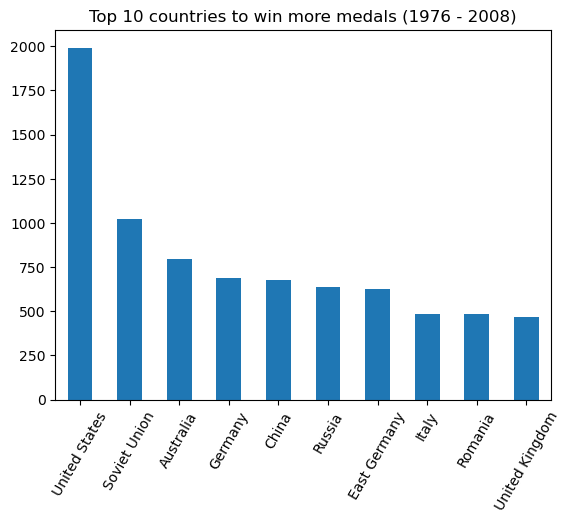

In [83]:
#country with the most medals
all_countries = data["Country"].value_counts()
top10 = all_countries[:10]
top10.plot(kind = 'bar')
plt.xticks(rotation = 60)
plt.title('Top 10 countries to win more medals (1976 - 2008)')

We have to consider the USSR was dismantled before the 1992 Olympics. 

Who won more medals in the final part of the Cold War (1976 - 1988)? The US or USSR? Western countries or Eastern ones? Let's find out with another bar graph.

Text(0.5, 1.0, 'Cold War competition')

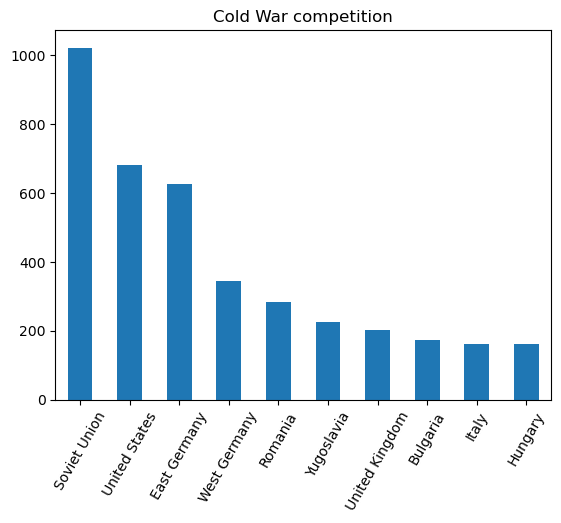

In [84]:
coldwar_df = data.query("Year < 1989")

coldwar_df_countries = coldwar_df["Country"].value_counts()
coldwar_top10 = coldwar_df_countries[:10]
coldwar_top10.plot(kind = 'bar')
plt.xticks(rotation = 60)
plt.title("Cold War competition")

Not only the Soviet Union beat the US, but also Eastern countries generally won more medals than Western ones: e.g. East Germany won more medals than West Germany, Romania and Yugoslavia won more than UK and Italy.

Text(0.5, 1.0, 'Medals won by USA per year')

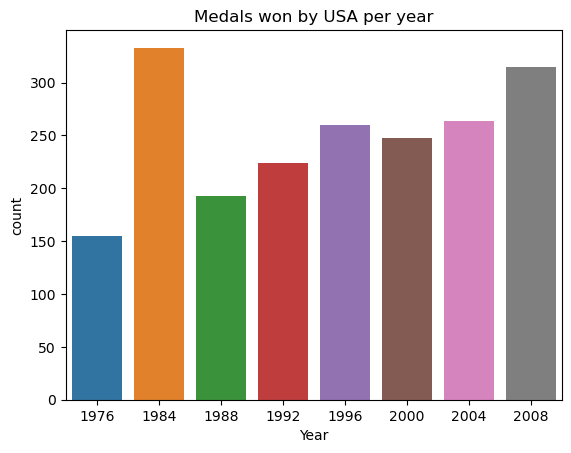

In [85]:
usdata = data.query("Country == 'United States'")
sns.countplot(x = 'Year', data = usdata)
plt.title("Medals won by USA per year")

Text(0.5, 1.0, 'Medals won by USSR per year')

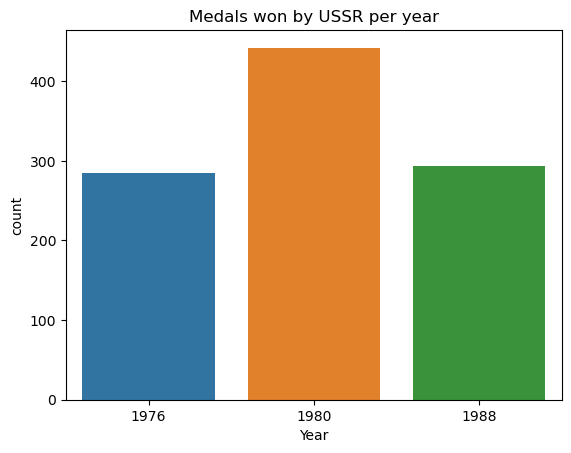

In [86]:
ussrdata = data.query("Country == 'Soviet Union'")
sns.countplot(x = 'Year', data = ussrdata)
plt.title("Medals won by USSR per year")

How many medals were awarded each year? What about men and women?

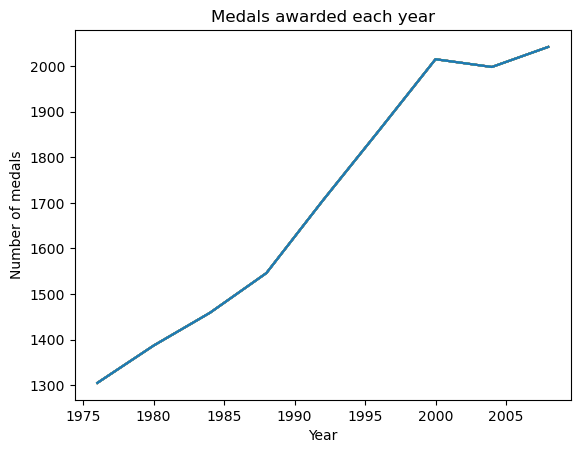

In [90]:
medals = data.groupby('Year').agg('count')

years = [1976, 1980, 1984, 1988, 1992, 1996, 2000, 2004, 2008]


plt.plot(years, medals)
plt.title('Medals awarded each year')
plt.xlabel('Year')
plt.ylabel('Number of medals')
plt.show()

We can see how the number of medals awarded skyrocketed between 1976 and 2000, increasing by about 54%. This shows how popular the Olympics became during the second half of the 20th century. 

At this point, we can start investigating the difference between the two genders.

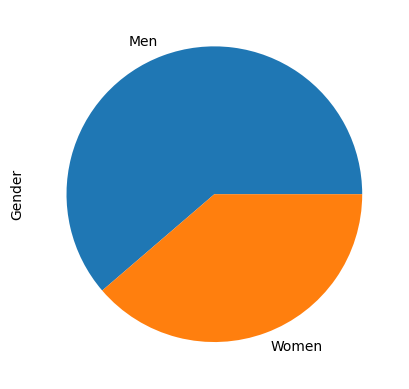

In [91]:
gender = data['Gender'].value_counts()
gender.plot.pie()

From this first pie chart we can see that more medals were available for men than women. Let's see if there were differences during the different editions of the Olympics.

Text(0.5, 1.0, 'Medals awarded to each genders per year')

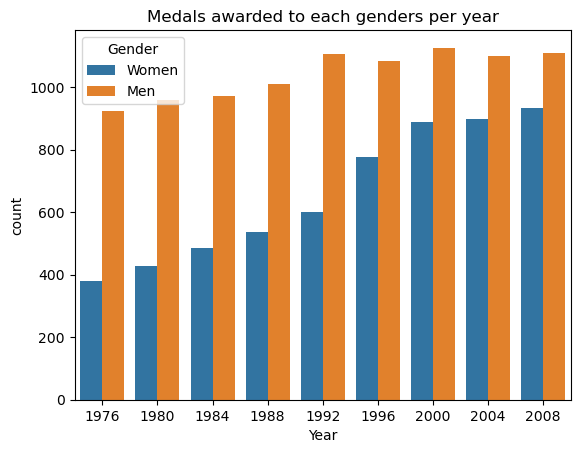

In [93]:
sns.countplot(x = 'Year', hue = 'Gender',data = data)
plt.title("Medals awarded to each genders per year")

We notice that while women's medals were less than half of men's medals in 1976, the gap got much smaller during the years, proving that women all around the world were getting more involved in sports and that the Olimpic authorities recognized this effort. We can now tell that the vertical rise in total medals awarded each year is largely due to the rise in the number of medals awarded to women.